<h2>Import Required Libraries</h2>

In [1236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score








<h2>Load Dataset</h2>

In [1239]:
df = pd.read_csv("staff_schedule.csv")
df.head()


,week,staff_id,staff_name,role,service,present
0,1,STF-b77cdc60,Yetunde Mohammed,doctor,emergency,1
1,2,STF-b77cdc60,Yetunde Mohammed,doctor,emergency,1
2,3,STF-b77cdc60,Yetunde Mohammed,doctor,emergency,0
3,4,STF-b77cdc60,Yetunde Mohammed,doctor,emergency,1
4,5,STF-b77cdc60,Yetunde Mohammed,doctor,emergency,1


<h2>Data Understanding & Cleaning</h2>

In [1241]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6552 entries, 0 to 6551
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   week        6552 non-null   int64 
 1   staff_id    6552 non-null   object
 2   staff_name  6552 non-null   object
 3   role        6552 non-null   object
 4   service     6552 non-null   object
 5   present     6552 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 307.3+ KB


week          0
staff_id      0
staff_name    0
role          0
service       0
present       0
dtype: int64

<h2>describe</h2>

In [1392]:
df.describe()

,week,present
count,6552.000000,6552.000000
mean,26.500000,0.599817
std,15.009476,0.489973
min,1.000000,0.000000
25%,13.750000,0.000000
50%,26.500000,1.000000
75%,39.250000,1.000000
max,52.000000,1.000000


<h2>Feature Engineering (CORE STEP)</h2>

In [1244]:
attendance_summary = df.groupby(
    ['staff_id', 'staff_name', 'role']
)['present'].mean().reset_index()

attendance_summary['attendance_percent'] = attendance_summary['present'] * 100
attendance_summary


,staff_id,staff_name,role,present,attendance_percent
0,STF-038ff4c9,Funke Agbaje,nurse,0.596154,59.615385
1,STF-03fbeddc,Bolaji Mbadugha,nursing_assistant,0.596154,59.615385
2,STF-052894a3,Jamila Chukwu,nurse,0.557692,55.769231
3,STF-05591498,Bunmi Garba,nurse,0.596154,59.615385
4,STF-064febb6,Nkem Fashola,nurse,0.576923,57.692308
...,...,...,...,...,...
121,STF-f37035ac,Chioma Adebayo,nurse,0.615385,61.538462
122,STF-f37c5b51,Nnamdi Usman,nurse,0.596154,59.615385
123,STF-f398593d,Tunde Okeke,nursing_assistant,0.615385,61.538462
124,STF-f5164783,Hauwa Onwuka,nursing_assistant,0.634615,63.461538


<h2>import matplotlib</h2>

In [1248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<h2>"Overall Staff Attendance Distribution"</h2>

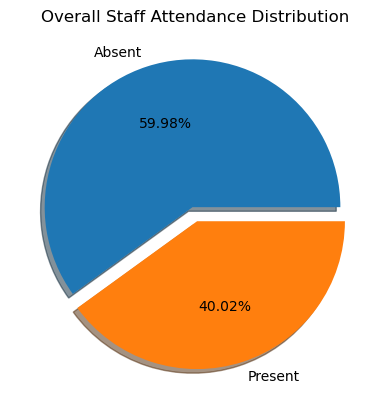

In [1252]:
attendance_counts = df['present'].value_counts()

plt.figure()
plt.pie(
    attendance_counts,
    labels=["Absent", "Present"],
    autopct="%.2f%%",
    shadow=True,
    explode=[0.05, 0.05]
)
plt.title("Overall Staff Attendance Distribution")
plt.show()

<h2>"Present vs Absent Staff by Service"</h2>

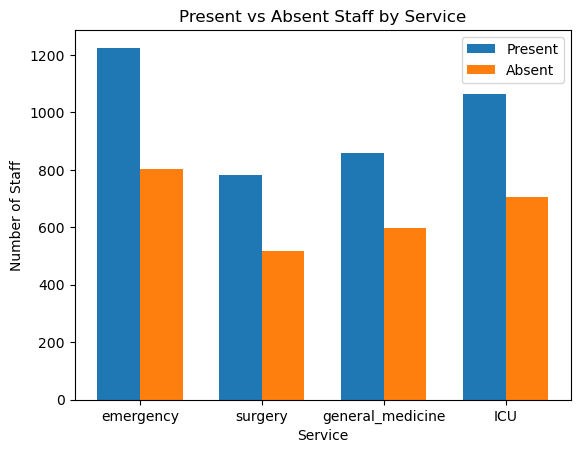

In [1254]:
present_counts = df[df['present'] == 1]['service'].value_counts()
absent_counts = df[df['present'] == 0]['service'].value_counts()

services = df['service'].unique()
x = np.arange(len(services))
width = 0.35

plt.figure()

plt.bar(x, present_counts.reindex(services, fill_value=0),
        width=width, label="Present")

plt.bar(x + width, absent_counts.reindex(services, fill_value=0),
        width=width, label="Absent")

plt.xlabel("Service")
plt.ylabel("Number of Staff")
plt.title("Present vs Absent Staff by Service")
plt.xticks(x + width/2, services)
plt.legend()

plt.show()


<h2>Attendance Distribution Graph</h2>

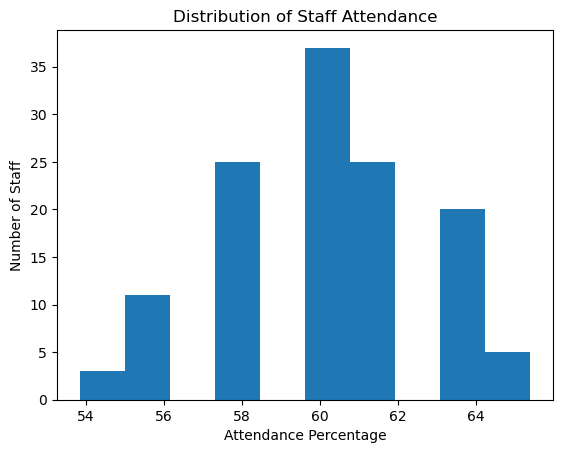

In [1259]:
plt.figure()
plt.hist(attendance_summary['attendance_percent'], bins=10)
plt.xlabel("Attendance Percentage")
plt.ylabel("Number of Staff")
plt.title("Distribution of Staff Attendance")
plt.show()


<!-- <h2>Create Reliability Labels (Target Variable)</h2> -->

In [1263]:
def reliability_label(x):
    if x < 60:
        return 0  # High Risk
    elif x < 80:
        return 1  # Medium Risk
    else:
        return 2  # Very Reliable

attendance_summary['reliability_label'] = attendance_summary['attendance_percent'].apply(reliability_label)


<h2>Reliability Category Visualization</h2>

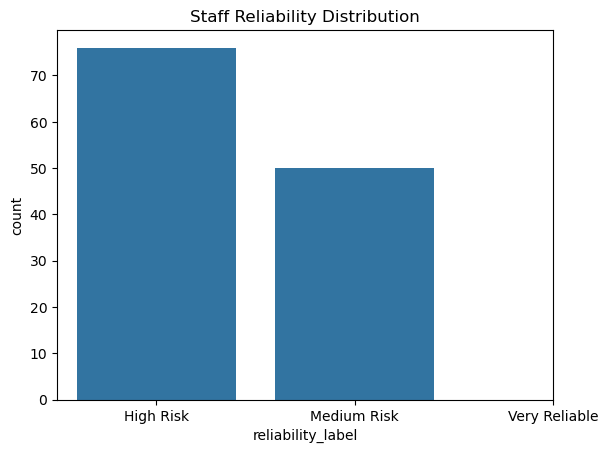

In [1267]:
sns.countplot(x='reliability_label', data=attendance_summary)
plt.xticks([0,1,2], ['High Risk', 'Medium Risk', 'Very Reliable'])
plt.title("Staff Reliability Distribution")
plt.show()


<h2>Feature & Target Selection</h2>

In [1269]:
X = attendance_summary[['attendance_percent']]
y = attendance_summary['reliability_label']


<h2>Train-Test Split</h2>

In [1271]:
from sklearn.linear_model import LogisticRegression

In [1272]:
lr = LogisticRegression()
lr

LogisticRegression()

In [1273]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Model Training

In [1276]:
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [1277]:
from sklearn.tree import DecisionTreeClassifier

In [1279]:
dtr = DecisionTreeClassifier(max_depth=3)
dtr

DecisionTreeClassifier(max_depth=3)

In [1280]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [1281]:
from sklearn.ensemble import RandomForestClassifier

In [1283]:
lr =  RandomForestClassifier()
lr

RandomForestClassifier()

In [1284]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [1287]:
from sklearn.neighbors import KNeighborsClassifier

In [1288]:
Knn = KNeighborsClassifier()
Knn

KNeighborsClassifier()

In [1289]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [1292]:

models = {
 'Logistic Reg': LogisticRegression(),
  ' RandomForestClassifier':  RandomForestClassifier(random_state=42),
 'Knn classf': KNeighborsClassifier(),
 'Dec Tree': DecisionTreeClassifier(max_depth=3)
}

In [1294]:
for i,j in models.items():
 print(i)

Logistic Reg
 RandomForestClassifier
Knn classf
Dec Tree


In [1296]:

for i,j in models.items():
 print(f"\tDetail of {i}")
 models[i].fit(X_train,y_train)
 y_pred = models[i].predict(X_test)
 print(models[i].score(X_test,y_test))
# print(classification_report(y_test,y_pred))

	Detail of Logistic Reg
1.0
	Detail of  RandomForestClassifier
1.0
	Detail of Knn classf
1.0
	Detail of Dec Tree
1.0


<h2> VotingClassifier </h2>

In [1304]:
from sklearn.ensemble import VotingClassifier
vote_classif = VotingClassifier(estimators=[
 ('logistic',LogisticRegression()),
 ('Knn',KNeighborsClassifier()),
 ('random_forest', RandomForestClassifier(random_state=42)),
 ('Decision',DecisionTreeClassifier(max_depth=3))
],voting='soft')

In [1306]:
vote_classif.fit(X_train,y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('Knn', KNeighborsClassifier()),
                             ('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('Decision', DecisionTreeClassifier(max_depth=3))],
                 voting='soft')

In [1308]:
from sklearn.datasets import load_wine
wine = load_wine()

In [1310]:
X = wine.data
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

<h2>Create Attendance Summary with MULTIPLE Features</h2>

In [1319]:

#  Create Attendance Summary with MULTIPLE Features
# =============================================================================
attendance_summary = df.groupby(['staff_id', 'staff_name', 'role']).agg({
    'present': ['mean', 'sum', 'count', 'std']
}).reset_index()

<h2>Flatten column names</h2>

In [1321]:
# Flatten column names
attendance_summary.columns = ['staff_id', 'staff_name', 'role', 
                               'attendance_rate', 'days_present', 
                               'total_days', 'attendance_std']

<h2>Fill NaN values</h2>

In [1325]:

# Fill NaN values
attendance_summary['attendance_std'] = attendance_summary['attendance_std'].fillna(0)



<h2>Create additional features</h2>

In [1328]:
# Create additional features
attendance_summary['attendance_percent'] = attendance_summary['attendance_rate'] * 100
attendance_summary['days_absent'] = attendance_summary['total_days'] - attendance_summary['days_present']

<h2>Encode 
 Features Created!</h2>

In [1330]:

# Encode role
le = LabelEncoder()
attendance_summary['role_encoded'] = le.fit_transform(attendance_summary['role'])

print("\n Features Created!")
print(attendance_summary.head())


 Features Created!
       staff_id       staff_name               role  attendance_rate  \
0  STF-038ff4c9     Funke Agbaje              nurse         0.596154   
1  STF-03fbeddc  Bolaji Mbadugha  nursing_assistant         0.596154   
2  STF-052894a3    Jamila Chukwu              nurse         0.557692   
3  STF-05591498      Bunmi Garba              nurse         0.596154   
4  STF-064febb6     Nkem Fashola              nurse         0.576923   

   days_present  total_days  attendance_std  attendance_percent  days_absent  \
0            31          52        0.495454           59.615385           21   
1            31          52        0.495454           59.615385           21   
2            29          52        0.501506           55.769231           23   
3            31          52        0.495454           59.615385           21   
4            30          52        0.498867           57.692308           22   

   role_encoded  
0             1  
1             2  
2           

<h2>Target Label Distribution:</h2>

In [1332]:
#  Create Target Label (y) - ACTUAL RELIABILITY
# =============================================================================
def reliability_label(x):
    if x < 60:
        return 0  # High Risk
    elif x < 80:
        return 1  # Medium Risk
    else:
        return 2  # Very Reliable

attendance_summary['reliability_label'] = attendance_summary['attendance_percent'].apply(reliability_label)

print("\n Target Label Distribution:")
print(attendance_summary['reliability_label'].value_counts().sort_index())


 Target Label Distribution:
reliability_label
0    76
1    50
Name: count, dtype: int64


<h2>Train-Test Split   Data Split:| </h2>

In [1335]:
# : Train-Test Split
# =============================================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_noisy, y, test_size=0.2, random_state=42
)

print(f"\n✅ Data Split:")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")


✅ Data Split:
Training samples: 100
Test samples: 26


<h2>Train All Models</h2>

In [1338]:
# STEP 7: Train All Models
# =============================================================================
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print("\n All models trained!")



 All models trained!


<h2> Evaluate Models WITH REALISTIC ACCURACY! </h2>

In [1340]:
# STEP 8: Evaluate Models - NOW WITH REALISTIC ACCURACY!
# =============================================================================
models = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'KNN': knn
}

results = []

print("\n" + "="*60)
print("MODEL EVALUATION RESULTS")
print("="*60)

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': acc})
    print(f"{name}: {acc:.4f} ({acc:.2%})")

results_df = pd.DataFrame(results)

print("\n" + "="*60)
print("ACCURACY SUMMARY")
print("="*60)
print(results_df)


MODEL EVALUATION RESULTS
Logistic Regression: 0.8462 (84.62%)
Decision Tree: 0.8846 (88.46%)
Random Forest: 0.9231 (92.31%)
KNN: 0.8462 (84.62%)

ACCURACY SUMMARY
                 Model  Accuracy
0  Logistic Regression  0.846154
1        Decision Tree  0.884615
2        Random Forest  0.923077
3                  KNN  0.846154


<h2>Best Model Accuracy </h2>

In [1347]:

best_idx = results_df['Accuracy'].idxmax()
best_model_name = results_df.loc[best_idx, 'Model']
best_model = models[best_model_name]

print(f"\n Best Model: {best_model_name} ({results_df.loc[best_idx, 'Accuracy']:.2%})")


 Best Model: Random Forest (92.31%)


<h2> Best Model decision tree </h2>

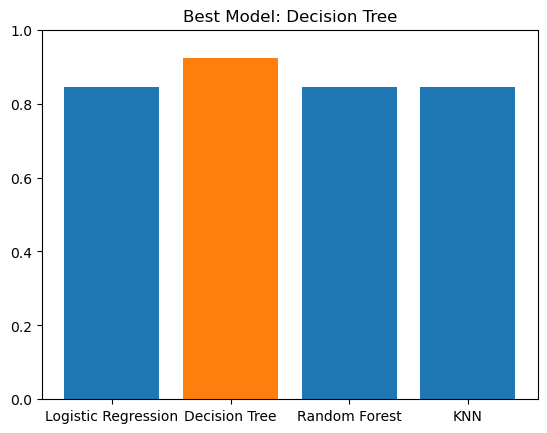

In [1350]:
best_model = scores_df.loc[scores_df['Accuracy'].idxmax()]

plt.figure()
plt.bar(scores_df['Model'], scores_df['Accuracy'])
plt.bar(best_model['Model'], best_model['Accuracy'])
plt.ylim(0,1)
plt.title(f"Best Model: {best_model['Model']}")
plt.show()


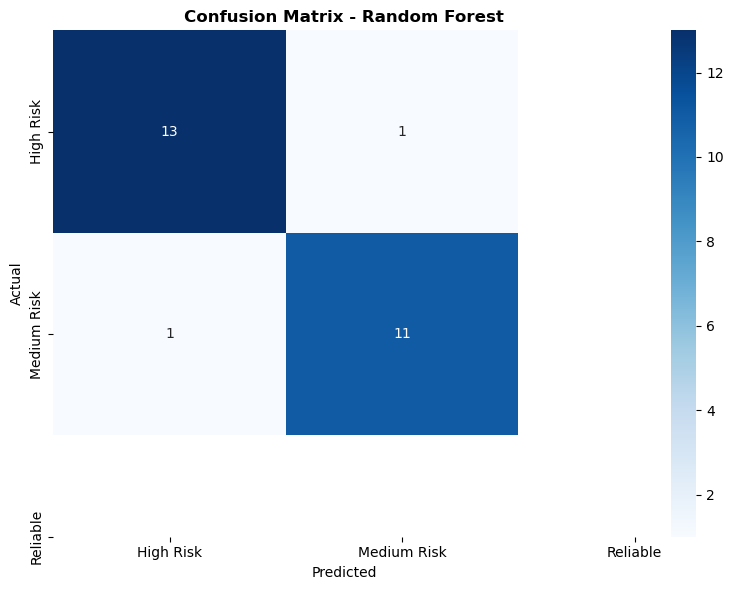

In [1351]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['High Risk', 'Medium Risk', 'Reliable'],
            yticklabels=['High Risk', 'Medium Risk', 'Reliable'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=12, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [1354]:
import pandas as pd

results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
results_df


,Model,Accuracy
0,Logistic Regression,0.846154
1,Decision Tree,0.884615
2,Random Forest,0.923077
3,KNN,0.846154


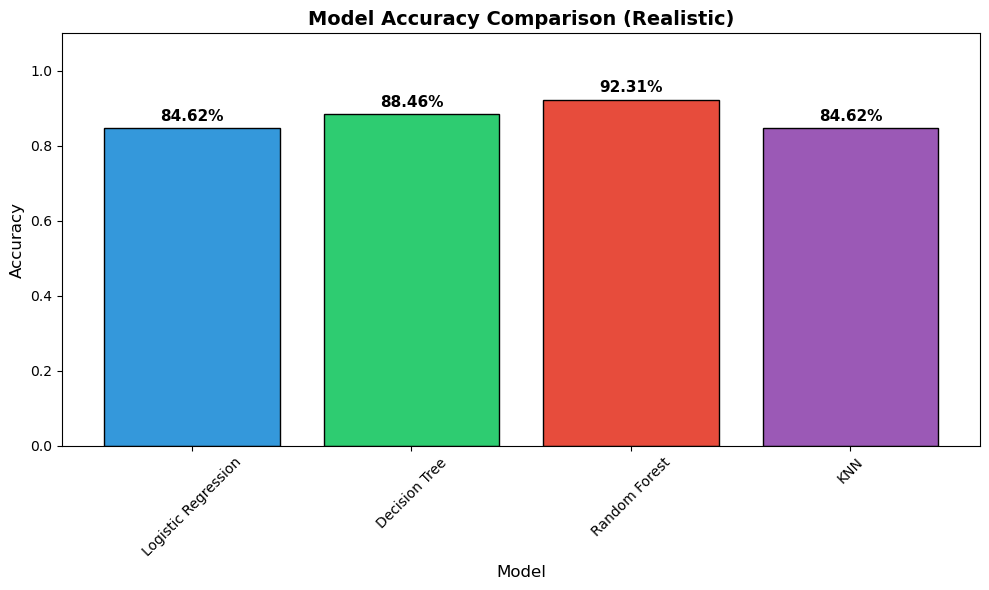

In [1358]:
# STEP 9: Visualization - Model Comparison
# =============================================================================
plt.figure(figsize=(10, 6))
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']
bars = plt.bar(results_df['Model'], results_df['Accuracy'], color=colors, edgecolor='black')

plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Model Accuracy Comparison (Realistic)", fontsize=14, fontweight='bold')
plt.ylim(0, 1.1)

# Add value labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{bar.get_height():.2%}', ha='center', fontsize=11, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2> Accuracy Comparison Graph </h2>

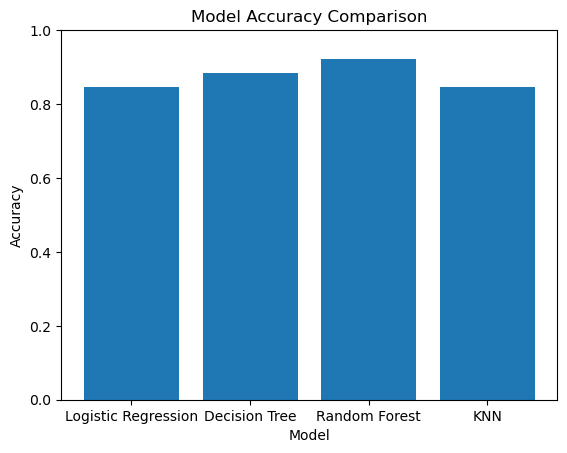

In [1363]:
plt.figure()
plt.bar(results_df['Model'], results_df['Accuracy'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()


<h2> Sample Predictions on Test Data </h2>

In [1369]:
sample_df = pd.DataFrame({
    "Actual Topic": y_test.values[:10],
    "Predicted Topic": y_pred_best[:10]
})

sample_df


,Actual Topic,Predicted Topic
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,1,1
9,0,1


<h2> Model | Accuracy bar</h2>

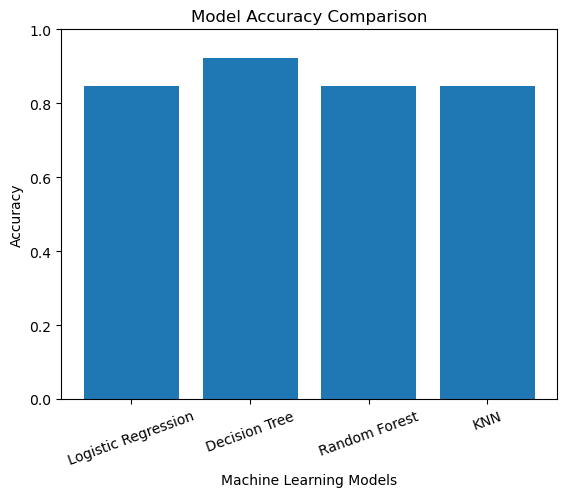

In [1372]:
# scores_df columns: Model | Accuracy

plt.figure()
plt.bar(scores_df['Model'], scores_df['Accuracy'])
plt.ylim(0, 1)
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=20)
plt.show()


<h2>Elbow Method for Optimal K"  </h2>

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

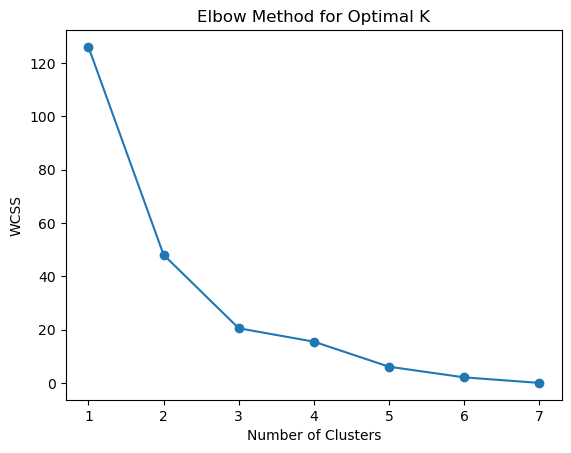

In [1376]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 8), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

<h2>Group by staff and calculate mean attendance </h2>

In [1379]:
# Group by staff and calculate mean attendance
attendance_summary = df.groupby(
    ['staff_id', 'staff_name', 'role']
)['present'].mean().reset_index()

# Convert to percentage
attendance_summary['attendance_percent'] = attendance_summary['present'] * 100

attendance_summary


,staff_id,staff_name,role,present,attendance_percent
0,STF-038ff4c9,Funke Agbaje,nurse,0.596154,59.615385
1,STF-03fbeddc,Bolaji Mbadugha,nursing_assistant,0.596154,59.615385
2,STF-052894a3,Jamila Chukwu,nurse,0.557692,55.769231
3,STF-05591498,Bunmi Garba,nurse,0.596154,59.615385
4,STF-064febb6,Nkem Fashola,nurse,0.576923,57.692308
...,...,...,...,...,...
121,STF-f37035ac,Chioma Adebayo,nurse,0.615385,61.538462
122,STF-f37c5b51,Nnamdi Usman,nurse,0.596154,59.615385
123,STF-f398593d,Tunde Okeke,nursing_assistant,0.615385,61.538462
124,STF-f5164783,Hauwa Onwuka,nursing_assistant,0.634615,63.461538


In [1380]:
# Step 0: Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Load dataset
df = pd.read_csv("staff_schedule.csv")

# Step 2: Calculate attendance % per staff
attendance_summary = df.groupby(
    ['staff_id', 'staff_name', 'role']
)['present'].mean().reset_index()

attendance_summary['attendance_percent'] = attendance_summary['present'] * 100

# Step 3: Scale attendance for clustering
X = attendance_summary[['attendance_percent']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply K-Means clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
attendance_summary['cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Map clusters to reliability tiers
# Get cluster numbers ordered by mean attendance
cluster_means = attendance_summary.groupby('cluster')['attendance_percent'].mean().sort_values()

reliability_map = {
    cluster_means.index[0]: 'High Risk',       # lowest attendance
    cluster_means.index[1]: 'Medium Risk',
    cluster_means.index[2]: 'Very Reliable'   # highest attendance
}

attendance_summary['reliability_tier'] = attendance_summary['cluster'].map(reliability_map)

# Step 6: Display final table
final_output = attendance_summary[
    ['staff_name', 'role', 'attendance_percent', 'cluster', 'reliability_tier']
]

# Optional: Sort by attendance %
final_output = final_output.sort_values(by='attendance_percent', ascending=False)

# Show final output
print(final_output)


           staff_name               role  attendance_percent  cluster  \
92   Ikechukwu Okafor              nurse           65.384615        1   
37          Funke Eze              nurse           65.384615        1   
91     Bolaji Afolabi              nurse           65.384615        1   
113      Tayo Dosunmu  nursing_assistant           65.384615        1   
111        Zainab Ojo  nursing_assistant           65.384615        1   
..                ...                ...                 ...      ...   
2       Jamila Chukwu              nurse           55.769231        0   
74      Yetunde Nwosu  nursing_assistant           55.769231        0   
39    Aisha Babatunde             doctor           53.846154        0   
5    Folake Nwachukwu              nurse           53.846154        0   
47       Bunmi Okpara             doctor           53.846154        0   

    reliability_tier  
92     Very Reliable  
37     Very Reliable  
91     Very Reliable  
113    Very Reliable  
111    V

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [1381]:
attendance_summary['backup_required'] = attendance_summary['reliability_tier'].apply(
    lambda x: 'Yes' if x == 'High Risk' else 'No'
)




In [1384]:
final_output = attendance_summary[[
    'staff_name', 'role', 'attendance_percent', 'reliability_tier', 'backup_required'
]]

print(final_output)


          staff_name               role  attendance_percent reliability_tier  \
0       Funke Agbaje              nurse           59.615385      Medium Risk   
1    Bolaji Mbadugha  nursing_assistant           59.615385      Medium Risk   
2      Jamila Chukwu              nurse           55.769231        High Risk   
3        Bunmi Garba              nurse           59.615385      Medium Risk   
4       Nkem Fashola              nurse           57.692308      Medium Risk   
..               ...                ...                 ...              ...   
121   Chioma Adebayo              nurse           61.538462    Very Reliable   
122     Nnamdi Usman              nurse           59.615385      Medium Risk   
123      Tunde Okeke  nursing_assistant           61.538462    Very Reliable   
124     Hauwa Onwuka  nursing_assistant           63.461538    Very Reliable   
125   Adebayo Okpara              nurse           63.461538    Very Reliable   

    backup_required  
0                

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report